# Classification

Import the libraries necessary to analize data

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [279]:
df = pd.read_csv('../df_after_dp.csv', parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187534 entries, 0 to 187533
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   date                              187534 non-null  datetime64[ns]
 1   state                             187534 non-null  object        
 2   city_or_county                    187534 non-null  object        
 3   latitude                          187534 non-null  float64       
 4   longitude                         187534 non-null  float64       
 5   congressional_district            187534 non-null  int64         
 6   avg_age_participants              187534 non-null  float64       
 7   n_participants_child              187534 non-null  int64         
 8   n_participants_teen               187534 non-null  int64         
 9   n_females                         187534 non-null  float64       
 10  n_killed                        

In [280]:
#check if there is any null value
df.isnull().values.any()

False

The calssification task requires to predict whether in the incident there were killed people. Hence we create the binary attribute involve_killing

In [281]:
df['involve_killing'] = np.where(df['n_killed'] > 0, 1, 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187534 entries, 0 to 187533
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   date                              187534 non-null  datetime64[ns]
 1   state                             187534 non-null  object        
 2   city_or_county                    187534 non-null  object        
 3   latitude                          187534 non-null  float64       
 4   longitude                         187534 non-null  float64       
 5   congressional_district            187534 non-null  int64         
 6   avg_age_participants              187534 non-null  float64       
 7   n_participants_child              187534 non-null  int64         
 8   n_participants_teen               187534 non-null  int64         
 9   n_females                         187534 non-null  float64       
 10  n_killed                        

In [282]:
col_to_plot = [i for i in list(df.columns) if i not in ['latitude', 'longitude', 'date','state','city_or_county','congressional_district', 'incident_characteristics1']] 

corr_matrix_ind = df[col_to_plot].corr(numeric_only=True, method='pearson')
corr_matrix_ind

avg_age_participants  n_participants_child  \
avg_age_participants                          1.000000             -0.175278   
n_participants_child                         -0.175278              1.000000   
n_participants_teen                          -0.289719              0.011801   
n_females                                     0.057621              0.143355   
n_killed                                      0.126576              0.063632   
n_injured                                    -0.102553              0.053361   
n_arrested                                   -0.047418             -0.011199   
n_unharmed                                   -0.015379              0.110597   
n_participants                               -0.050232              0.131445   
povertyPercentage                             0.027709              0.031221   
candidatevotes                               -0.009897             -0.023458   
totalvotes                                    0.012246             -0.026072   
child_percentage_per_district                -0.144844              0.739767   
teen_percentage_per_district                 -0.188539              0.008228   
killed_percentage_per_district                0.129176              0.046680   
injured_percentage_per_district              -0.017038              0.033203   
arrested_percentage_per_district             -0.011172             -0.002922   
unharmed_percentage_per_district              0.009028              0.056719   
killed_rate                                   0.130686              0.011440   
injured_rate                                 -0.109933              0.019320   
arrested_rate                                 0.000421             -0.042073   
survival_rate                                 0.004519              0.048676   
n_harmed                                     -0.045261              0.062452   
winning_party_percentage                     -0.033316              0.005658   
involve_killing                               0.108380              0.020479   

                                  n_participants_teen  n_females  n_killed  \
avg_age_participants                        -0.289719   0.057621  0.126576   
n_participants_child                         0.011801   0.143355  0.063632   
n_participants_teen                          1.000000   0.095079  0.015531   
n_females                                    0.095079   1.000000  0.178922   
n_killed                                     0.015531   0.178922  1.000000   
n_injured                                    0.111810   0.167129 -0.182932   
n_arrested                                   0.191621   0.169556 -0.031980   
n_unharmed                                   0.082485   0.188492 -0.103562   
n_participants                               0.262196   0.430273  0.220567   
povertyPercentage                            0.013198   0.052073  0.066325   
candidatevotes                              -0.014046  -0.030701 -0.052148   
totalvotes                                  -0.019221  -0.033256 -0.074770   
child_percentage_per_district                0.010006   0.109145  0.057373   
teen_percentage_per_district                 0.615982   0.064554  0.023681   
killed_percentage_per_district               0.005996   0.134572  0.639794   
injured_percentage_per_district              0.051184   0.091590 -0.073415   
arrested_percentage_per_district             0.092784   0.084252  0.008883   
unharmed_percentage_per_district             0.033594   0.098078 -0.057713   
killed_rate                                 -0.032620   0.040933  0.859053   
injured_rate                                 0.026612  -0.005063 -0.290224   
arrested_rate                                0.067483   0.010042 -0.144310   
survival_rate                                0.011639   0.084376 -0.143200   
n_harmed                                     0.234493   0.342530  0.334891   
winning_party_percentage                     0.005544   0.005547  0.035659   
inv

<Axes: >

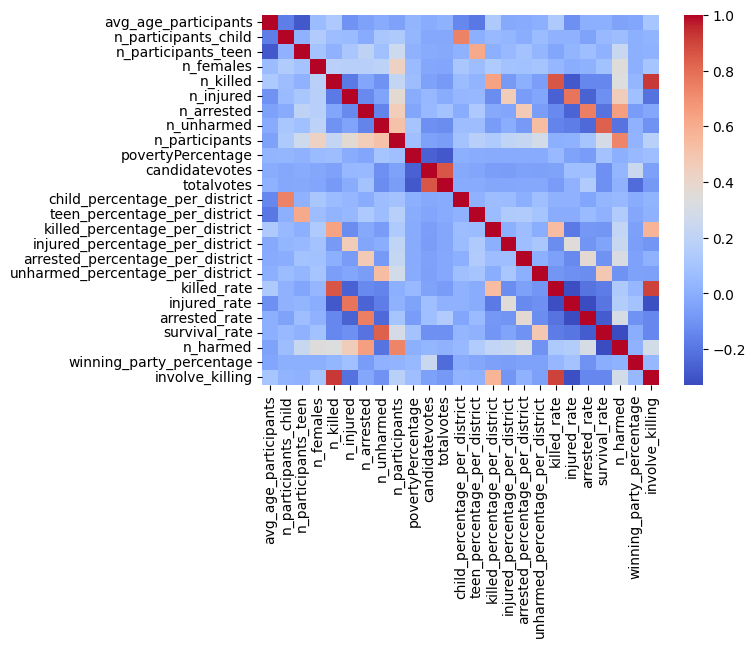

In [283]:
sns.heatmap(corr_matrix_ind, annot=False, cmap='coolwarm')

## Discretize categorical values

We discretize the categorical values to use them in the classification task

In [284]:
def discretize_data(dataset, variables):
    for variable in variables:
        #get the unique variable's values
        var = sorted(dataset[variable].unique())
        
        #generate a mapping from the variable's values to the number representation  
        mapping = dict(zip(var, range(0, len(var) + 1)))

        #add a new colum with the number representation of the variable
        dataset[variable+'_num'] = dataset[variable].map(mapping).astype(int)
    return dataset

In [285]:
to_discretize = ['date', 'state', 'city_or_county', 'party']
df = discretize_data(df, to_discretize)

In [286]:
df.drop(columns=['date', 'state', 'city_or_county', 'party', 'incident_characteristics1'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187534 entries, 0 to 187533
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   latitude                          187534 non-null  float64
 1   longitude                         187534 non-null  float64
 2   congressional_district            187534 non-null  int64  
 3   avg_age_participants              187534 non-null  float64
 4   n_participants_child              187534 non-null  int64  
 5   n_participants_teen               187534 non-null  int64  
 6   n_females                         187534 non-null  float64
 7   n_killed                          187534 non-null  float64
 8   n_injured                         187534 non-null  float64
 9   n_arrested                        187534 non-null  float64
 10  n_unharmed                        187534 non-null  float64
 11  n_participants                    187534 non-null  f

In [287]:
df.drop(columns=['n_killed', 'killed_rate','survival_rate','candidatevotes','n_injured','n_arrested','killed_percentage_per_district','longitude','latitude'], axis=1,inplace=True)

We split the dataset into training set and test set, we do a stratified split.

In [288]:
from sklearn.model_selection import train_test_split
label = df.pop('involve_killing')

In [289]:
#percentage of incidents that involve killing over the total number of incidents we consider
#label.sum() / label.count()

We partitioned the dataset into training, validation, and test sets using a 70/15/15 split. Additionally, by merging the training and validation sets, we established a development set, comprising 85% of the data, since certain models do not necessitate validation.

In [290]:
X_trvl, X_test, y_trvl, y_test = train_test_split(df, label, test_size=0.15,random_state=10, stratify=label)
X_train, X_val, y_train, y_val = train_test_split(X_trvl, y_trvl, test_size=0.18,random_state=10, stratify=y_trvl)

Normalization

In [291]:
from sklearn.discriminant_analysis import StandardScaler
scaler = StandardScaler()
X_sc_trvl = scaler.fit_transform(X_trvl)
X_sc_train = scaler.fit_transform(X_train)
X_sc_val = scaler.fit_transform(X_val)
X_sc_test = scaler.fit_transform(X_test)

## Decision tree

These are the metrics used to evaluate the classification goodness.

In [292]:
from sklearn import metrics

def print_accuracy(y_train,train_pred,test_pred):
    print('Accuracy train set ', metrics.accuracy_score(y_train, train_pred))
    print('Accuracy test set ', metrics.accuracy_score(y_test, test_pred))
    print('Precision train set ', metrics.precision_score(y_train, train_pred, average='weighted'))
    print('Recall train set ', metrics.recall_score(y_train, train_pred, average='weighted'))
    print('F1 score train set ', metrics.f1_score(y_train, train_pred, average='weighted'))
    print('Support train set ', metrics.precision_recall_fscore_support(y_train, train_pred))

In [293]:
# Functions that prints the classification report
from sklearn.metrics import classification_report
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['non-killing', 'killing']))

We fit the decision tree on our training data.

In [294]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
params = [{
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [3,4,5,6,7,8,9,10,None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2,3,4,5,6,10,20,30,40,50],
    'min_samples_leaf': [2,3,4,5,6,10,20,30,40,50]
    }] 
grd_tree = GridSearchCV(tree.DecisionTreeClassifier(), params, refit = True, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)
grd_tree.fit(X_sc_trvl, y_trvl)
print("DT - Best parameters set found:")
print(grd_tree.best_params_)
print("DT - Best accuraccy score found:")
print(grd_tree.best_score_)

'from sklearn.model_selection import GridSearchCV\nfrom sklearn import tree\nparams = [{\n    \'criterion\': [\'gini\', \'entropy\',\'log_loss\'],\n    \'max_depth\': [3,4,5,6,7,8,9,10,None],\n    \'max_features\': [\'sqrt\', \'log2\', None],\n    \'min_samples_split\': [2,3,4,5,6,10,20,30,40,50],\n    \'min_samples_leaf\': [2,3,4,5,6,10,20,30,40,50]\n    }] \ngrd_tree = GridSearchCV(tree.DecisionTreeClassifier(), params, refit = True, cv=5, scoring=\'accuracy\', n_jobs=-1, verbose=10)\ngrd_tree.fit(X_sc_trvl, y_trvl)\nprint("DT - Best parameters set found:")\nprint(grd_tree.best_params_)\nprint("DT - Best accuraccy score found:")\nprint(grd_tree.best_score_)'

In [295]:
from sklearn import tree

#{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 30, 'min_samples_split': 4}

dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=None, max_features = None, min_samples_split=4, min_samples_leaf=30)
dt = dt.fit(X_sc_trvl, y_trvl)

This yields the following decision tree.

In [296]:
from IPython.display import Image
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(X_trvl.columns),  
                         class_names=['0', '1'],
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.431332 to fit



The predicted values obtained using the decision tree are then computed.

In [297]:
train_pred_dt = dt.predict(X_sc_train)
test_pred_dt = dt.predict(X_sc_test)
print_accuracy(y_train,train_pred_dt,test_pred_dt)

Accuracy train set  0.9779588401805523
Accuracy test set  0.9767160783477302
Precision train set  0.978200919199294
Recall train set  0.9779588401805523
F1 score train set  0.9780433945203735
Support train set  (array([0.98897044, 0.942912  ]), array([0.98218619, 0.96410693]), array([0.98556664, 0.95339168]), array([100147,  30563], dtype=int64))


TODO si potrebbe fare un confronto tra i diversi criteri di splitting:

In [298]:
dt_log = tree.DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=10, min_samples_split=3, min_samples_leaf=4)
dt_log = dt_log.fit(X_train, y_train)

from IPython.display import Image
dot_data = tree.export_graphviz(dt_log, out_file=None, 
                         feature_names=list(X_trvl.columns),  
                         class_names=['0', '1'],
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
train_pred_dt_log = dt_log.predict(X_train)
test_pred_dt_log = dt_log.predict(X_test)
print_accuracy(y_train,train_pred_dt_log,test_pred_dt_log)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.860184 to fit

Accuracy train set  0.9758090429194399
Accuracy test set  0.9752941594682023
Precision train set  0.9763323921218641
Recall train set  0.9758090429194399
F1 score train set  0.975965659525358
Support train set  (array([0.98995686, 0.93168857]), array([0.97835182, 0.96747701]), array([0.98412013, 0.94924559]), array([100147,  30563], dtype=int64))


The following are the values of the confusion matrix.

In [299]:
cm = confusion_matrix(y_test, test_pred_dt)
cm

array([[21171,   382],
       [  273,  6305]], dtype=int64)

We plotted the confusion matrix.

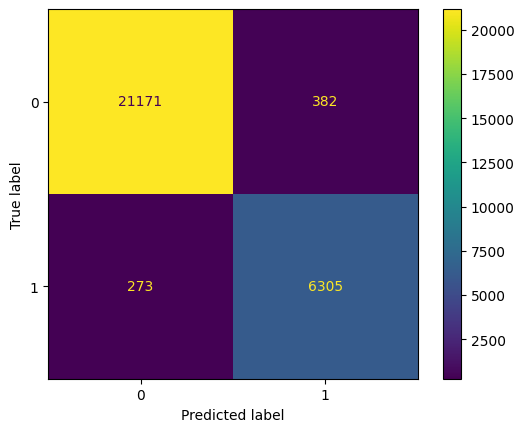

In [300]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

We plotted the scatter plot for the classification values on the test set.

In [301]:

# TODO sistemare questa riga
#plt.scatter(test_set.iloc[:, 5].values, test_set.iloc[:, 2].values, c=test_label.values, s=25, cmap='YlGn');

## Naive Bayes

Bayes theorem is used to compute the probability of an instance belonging to a given class given some prior knowledge.
We fit the model on our training data.

In [317]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_sc_train, y_train)
train_pred_gnb = gnb.predict(X_sc_train)
val_pred_gnb = gnb.predict(X_sc_val)
print("Validation: ")
report_scores(y_val,val_pred_gnb)

Validation: 
              precision    recall  f1-score   support

 non-killing       0.86      0.94      0.90     21984
     killing       0.72      0.48      0.58      6709

    accuracy                           0.83     28693
   macro avg       0.79      0.71      0.74     28693
weighted avg       0.82      0.83      0.82     28693



In [303]:
from sklearn.naive_bayes import BernoulliNB
brlbn = BernoulliNB()
brlbn.fit(X_train, y_train)
val_pred_brlbn = brlbn.predict(X_val)
print("Validation: ")
report_scores(y_val,val_pred_brlbn)


Validation: 
              precision    recall  f1-score   support

 non-killing       0.88      0.86      0.87     21984
     killing       0.58      0.63      0.61      6709

    accuracy                           0.81     28693
   macro avg       0.73      0.75      0.74     28693
weighted avg       0.81      0.81      0.81     28693



In [304]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation: ")
report_scores(y_val,y_pred)

Validation: 
              precision    recall  f1-score   support

 non-killing       0.78      0.51      0.62     21984
     killing       0.25      0.53      0.34      6709

    accuracy                           0.52     28693
   macro avg       0.52      0.52      0.48     28693
weighted avg       0.66      0.52      0.55     28693



In [305]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB()
model.fit(X_train, y_train)
y_pred_cp = model.predict(X_val)
print("Validation: ")
report_scores(y_val,y_pred_cp)

Validation: 
              precision    recall  f1-score   support

 non-killing       0.78      0.51      0.62     21984
     killing       0.25      0.53      0.34      6709

    accuracy                           0.52     28693
   macro avg       0.52      0.52      0.48     28693
weighted avg       0.66      0.52      0.55     28693



We chose the best among the classifiers, based on validation set and tested it.

In [306]:
test_pred_gnb = gnb.predict(X_sc_test)
print_accuracy(y_train,train_pred_gnb,test_pred_gnb)


Accuracy train set  0.8348940402417565
Accuracy test set  0.8359105613024777
Precision train set  0.8243212462701784
Recall train set  0.8348940402417565
F1 score train set  0.8229222681319845
Support train set  (array([0.85716364, 0.71670527]), array([0.94137618, 0.48597978]), array([0.89729838, 0.57921111]), array([100147,  30563], dtype=int64))


We plotted the scatter plot for the classification values on the test set.

In [307]:
#plt.scatter(test_set.iloc[:, 3].values, test_set.iloc[:, 6].values, c=test_label.values, s=25, cmap='RdBu')

In [308]:
#plt.scatter(test_set.iloc[:, 3].values, test_set.iloc[:, 6].values, c=test_pred_gnb, s=25, cmap='RdBu');

The following are the values of the confusion matrix.

In [309]:
cm = confusion_matrix(y_test, test_pred_gnb)
cm

array([[20288,  1265],
       [ 3351,  3227]], dtype=int64)

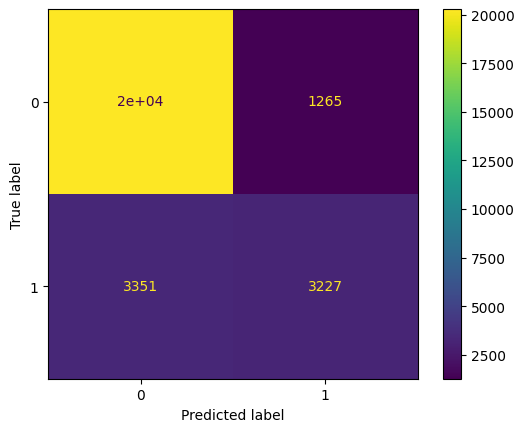

In [310]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

## Random Forest

### Grid search for parameter setting

In order to find the best parameters we use a grid search.
The parameters values we want to find are the following.

In [311]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = [{
'max_depth': [5, 15, None],
'max_features': ['log2', None],
'min_samples_leaf': [1, 2, 4],
'n_estimators': [32, 64, 128],
"bootstrap": [True, False],
"criterion": ["entropy", "gini"],
"class_weight":['balanced', None, {0: 0.3, 1: 0.7}]
}]

rd_fr_grid = GridSearchCV(RandomForestClassifier(), params,refit = True, cv=5, scoring='accuracy', n_jobs=10, verbose=10)
rd_fr_grid.fit(X_sc_trvl, y_trvl)
print("RF - Best parameters set found:")
print(rd_fr_grid.best_params_)
print("RF - Best accuraccy score found:")
print(rd_fr_grid.best_score_)

'params = [{\n\'max_depth\': [5, 15, None],\n\'max_features\': [\'log2\', None],\n\'min_samples_leaf\': [1, 2, 4],\n\'n_estimators\': [32, 64, 128],\n"bootstrap": [True, False],\n"criterion": ["entropy", "gini"],\n"class_weight":[\'balanced\', None, {0: 0.3, 1: 0.7}]\n}]\n\nrd_fr_grid = GridSearchCV(RandomForestClassifier(), params,refit = True, cv=5, scoring=\'accuracy\', n_jobs=10, verbose=10)\nrd_fr_grid.fit(X_sc_train, y_train)\nprint("RF - Best parameters set found:")\nprint(rd_fr_grid.best_params_)\nprint("RF - Best accuraccy score found:")\nprint(rd_fr_grid.best_score_)'

We print the best values we found for these parameters, along with their means and standard deviation.

In [313]:
print('Best setting parameters ', rd_fr_grid.cv_results_['params'][0])
print('Mean and std of this setting ', rd_fr_grid.cv_results_['mean_test_score'][0], 
      rd_fr_grid.cv_results_['std_test_score'][0])

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

We run the classifier and compute the perfomance scores.

In [ ]:
test_pred_rf = rd_fr_grid.predict(X_sc_test)
report_scores(y_test, test_pred_rf)

              precision    recall  f1-score   support

 non-killing       0.99      0.91      0.95     21553
     killing       0.78      0.98      0.87      6578

    accuracy                           0.93     28131
   macro avg       0.88      0.95      0.91     28131
weighted avg       0.94      0.93      0.93     28131



In [ ]:
test_pred_rf = rf.predict(test_set)
report_scores(test_label, test_pred_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45482
           1       1.00      1.00      1.00     13893

    accuracy                           1.00     59375
   macro avg       1.00      1.00      1.00     59375
weighted avg       1.00      1.00      1.00     59375



## AdaBoost

Grid search AdaBoost

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
def getAdaBoostBaseAlgo(num):
    if num == 0:
        return tree.DecisionTreeClassifier(max_depth=5)
    elif num == 1:
        return SVC(probability=True, kernel='rbf')
    elif num == 2:
        return RandomForestClassifier(max_depth=5)
    elif num == 3:
        return LogisticRegression()
                


In [ ]:

#base = tree.DecisionTreeClassifier(max_depth=5)
#clf = AdaBoostClassifier(estimator=base, n_estimators=200, learning_rate=0.1)

params = {
'base_estimator': [getAdaBoostBaseAlgo(0),getAdaBoostBaseAlgo(1),getAdaBoostBaseAlgo(2),getAdaBoostBaseAlgo(3)],
'n_estimators': [10,20,30,100,200,300], # The maximum number of estimators at which boosting is terminated.
'learning_rate': [1,0.1],
'random_state': [None]
}
ada_boost_grid = GridSearchCV(AdaBoostClassifier(), params,refit = True, cv=5, scoring='accuracy', n_jobs=10, verbose=10)
ada_boost_grid.fit(X_sc_trvl, y_trvl)
print("Ada Boost - Best parameters set found:")
print(ada_boost_grid.best_params_)
print("Ada Boost - Best accuraccy score found:")
print(ada_boost_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 

In [ ]:
test_pred_ada_boost = ada_boost_grid.predict(X_sc_test)
print(classification_report(y_test, 
                            test_pred_ada_boost, 
                            target_names=['no-killing', 'killing']))

              precision    recall  f1-score   support

  no-killing       0.97      0.97      0.97     21553
     killing       0.91      0.91      0.91      6578

    accuracy                           0.96     28131
   macro avg       0.94      0.94      0.94     28131
weighted avg       0.96      0.96      0.96     28131



ValueError: Found input variables with inconsistent numbers of samples: [28131, 130710]

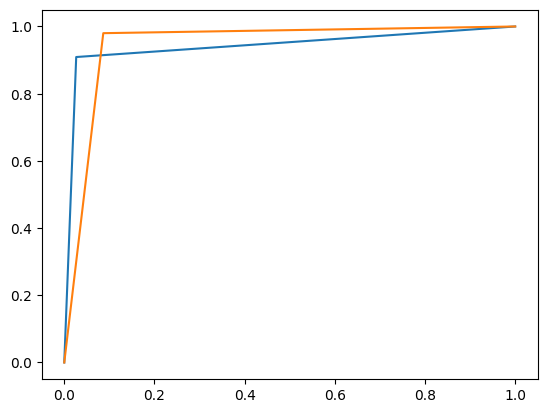

In [277]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(y_test, test_pred_ada_boost)
auc = metrics.roc_auc_score(y_test, test_pred_ada_boost)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, test_pred_rf)
auc = metrics.roc_auc_score(y_test, test_pred_rf)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, train_pred_dt)
auc = metrics.roc_auc_score(y_test, train_pred_dt)
plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, test_pred_gnb)
auc = metrics.roc_auc_score(y_test, test_pred_gnb)
plt.plot(fpr,tpr,label="Naive Bayes, auc="+str(auc))

plt.legend(loc=0)

## KNN

KNN works using a distance function, but distance can not be applied to categorical data. We need to handle categorical values, for example we could drop them.

We define the KNN calssifier by specifying the algorithm and the distance metric to use and we fit it to our data.

In [ ]:
metrics = [
'euclidean', 
'minkowski',
'chebyshev',
'cosine',
]
params = [{
    'n_neighbors': [100,130,160,190,200,250,300,400,500,600,700,800,900,1000,1100,1200],
    'algorithm':['auto','ball_tree'], 
    'metric':metrics, 
    'weights':["distance","uniform"]}]
    
knn_grid = GridSearchCV(KNeighborsClassifier(p = 1), params,refit = True, cv=5, scoring='accuracy', n_jobs=10, verbose=10)
knn_grid.fit(X_sc_trvl, y_trvl)
print("K_nn - Best parameters set found:")
print(knn_grid.best_params_)
print("K_nn - Best accuraccy score found:")
print(knn_grid.best_score_)

We run the prediction and evaluate the performance scores for this model.

In [ ]:
test_pred_knn = knn.predict(X_sc_test)
report_scores(y_test,test_pred_knn)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     45482
           1       0.98      0.78      0.87     13893

    accuracy                           0.94     59375
   macro avg       0.96      0.89      0.92     59375
weighted avg       0.95      0.94      0.94     59375



## SVM

In [ ]:
from sklearn.svm import SVC


params = [
{"kernel": ["rbf", "linear", "sigmoid"], "gamma": ["scale", "auto"], "C": [0.1,0.5, 1, 10, 100, 300, 1000]},
{"kernel": ["poly"], "degree": [2,3,4], "gamma": ["scale", "auto"], "C": [0.1,0.5, 1, 10, 100, 300, 1000]},#C term that gives more freedom for classification errors.

] 
svc_grid = GridSearchCV(svm.SVC(), params, refit = True, cv=cv, scoring='accuracy', n_jobs=-1, verbose=10)
svc_grid.fit(X_sc_trvl, y_train)
print("SVM - Best parameters set found:")
print(svc_grid.best_params_)
print("SVM - Best accuracy score found:")
print(svc_grid.best_score_)

We run the prediction on our test set.

In [ ]:
test_pred_proba_svm = svc_grid.predict_proba(X_sc_test)
report_scores(y_test,test_pred_proba_svm)

We plot the ROC curve in order to estimate the goodness of our classification.

In [318]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test.values, test_pred_proba_svm)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

## Rule-based classification

In order to run the RIPPER classifier, we run a grip search to find the best configuration parameter values.
In particular, the prune size defines the grow/prune proportion , while k is the number of optimization runs.

In [ ]:
import wittgenstein as lw
ripper = lw.RIPPER()
params = [{
"prune_size": [0.5, 0.6], 
"k": [1, 3, 5]
}]
ripper_grid = GridSearchCV(estimator=ripper, params,refit = True, cv=5, scoring='accuracy', n_jobs=10, verbose=10)
ripper_grid.fit(X_sc_trvl, y_trvl)
print("Ripper - Best parameters set found:")
print(ripper_grid.best_params_)
print("Ripper - Best accuraccy score found:")
print(ripper_grid.best_score_)

We run the model using the configuration found with grid search.

In [ ]:
ripper = lw.RIPPER(k=1, prune_size=0.50) #TODO sistemare con il risultato della validazione 
datas = pd.concat([X_sc_trvl, y_trvl], axis=1)
ripper.fit(datas, class_feat='involve_killing', pos_class=1) 

The rules yielded by the RIPPER model are the following.

In [ ]:
ripper.out_model()

We predict the class values using the rules found above.

In [ ]:
ripper.predict(y_test)

In order to evaluate the goodness of this classfication we compute the performance metrics.

In [ ]:
from sklearn.metrics import precision_score, recall_score
print('Accuracy ', ripper.score(X_sc_test, y_test))
print('Precision ', ripper.score(X_sc_test, y_test, precision_score))
print('Recall ', ripper.score(X_sc_test, y_test, recall_score))

TODO
with rule based classifiers it is possible to extract the reasons for the prediction.
only for the positive predictions

In [ ]:
ripper.predict(test_set[:20], give_reasons=True) #Explain the rules behind the first 20 instances that are classified as positive.

## Neural Network

We start by considering a neural network composed by one layer.

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1, 13)),
  tf.keras.layers.Dense(32, activation='sigmoid'),  
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adamax',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
y_train = np.asarray(train_label).astype('float32').reshape((-1,1))
x_train = np.reshape(train_set.values, (22792, 1, 13))
history = model.fit(x_train, y_train,
                    epochs=80,
                    batch_size=512,
                    validation_split=0.2)

In [ ]:
model.summary()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
x_test = np.reshape(test_set.values, (len(test_set), 1, 13))
test_pred_nn = (model.predict(x_test) > 0.5).astype("int32")

In [ ]:
print(test_pred_nn)
print(len(test_pred_nn))
print(len(test_set))

In [ ]:
report_scores(test_label, test_pred_nn)

TODO

Since the first neural network is not performing well, we can modify it, by adding hidden layers and dropout. 

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1, 13)),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adamax',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
y_train = np.asarray(train_label).astype('float32').reshape((-1,1))
history = model.fit(x_train, y_train,
                    epochs=80,
                    batch_size=256,
                    validation_split=0.2)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
test_pred_nn = (model.predict(x_test) > 0.5).astype("int32")
test_pred_nn

We compute the performance of the model.

In [ ]:
report_scores(test_label, test_pred_nn)